In [2]:
!pip install tensorflow

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt

In [24]:
# 1. Load training data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [25]:
# 2. Fill missing values in training data
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [26]:
# 3. Fit label encoders on training data
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

In [27]:
train_df['Sex'] = sex_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = embarked_encoder.fit_transform(train_df['Embarked'])

In [28]:
# 4. Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

In [29]:
# 6. Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# 7. Build Keras model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# 8. Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), verbose=0)

In [32]:
# 9. Evaluate
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8271 - loss: 0.4165
Validation Accuracy: 0.8268


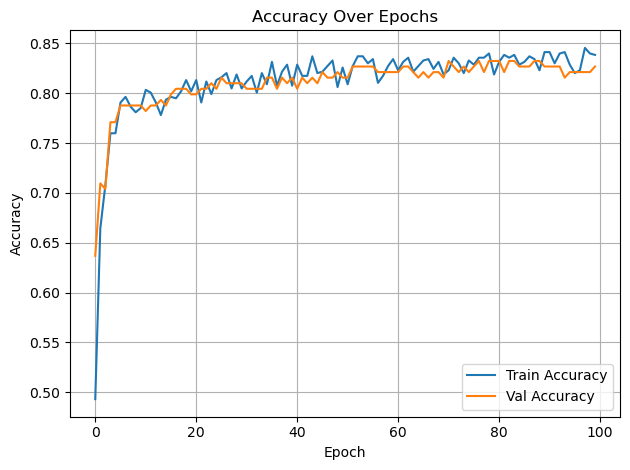

In [33]:
# 10. Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# 11. Fill missing values in test data
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [36]:
# 12. Encode categorical variables using same encoders
test_df['Sex'] = sex_encoder.transform(test_df['Sex'])
test_df['Embarked'] = embarked_encoder.transform(test_df['Embarked'])

In [37]:
# 13. Select and scale features
X_test = test_df[features]
X_test_scaled = scaler.transform(X_test)

In [38]:
# 14. Predict
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int).flatten()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [39]:
# 15. Create submission file
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})
submission_df.to_csv('submission.csv', index=False)
print("✅ submission.csv created!")

✅ submission.csv created!
